# Appliances energy prediction data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import timedelta
from datetime import datetime
import matplotlib.dates as mdates
plt.style.use('seaborn')
%matplotlib inline
from sklearn import linear_model
from sklearn.metrics import r2_score
pd.options.mode.chained_assignment = None

In [2]:
energy = pd.read_csv('data/energydata_complete.csv')
train = pd.read_csv('data/training.csv')
test = pd.read_csv('data/testing.csv')

In [3]:
energy.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


Text(0,0.5,'Appliances Wh')

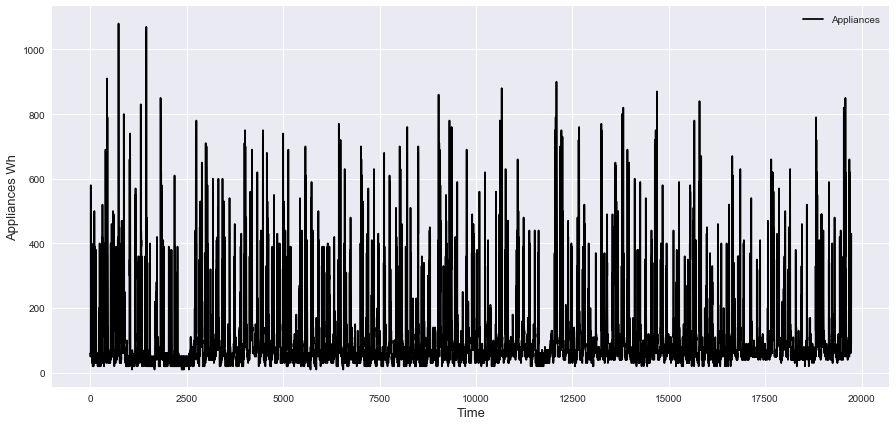

In [4]:
energy.plot.line(x=energy.index, y='Appliances', figsize=(15,7), color= 'black')
plt.xlabel('Time', fontsize=13)
plt.ylabel('Appliances Wh', fontsize=13)

In [5]:
df = energy[['date','Appliances']]
df.head()

,date,Appliances
0,2016-01-11 17:00:00,60
1,2016-01-11 17:10:00,60
2,2016-01-11 17:20:00,50
3,2016-01-11 17:30:00,50
4,2016-01-11 17:40:00,60


In [6]:
df['date'] = pd.to_datetime(df['date'])
df.index = df['date']
df = df.drop('date', 1)

In [7]:
df.head()

,Appliances
date,
2016-01-11 17:00:00,60
2016-01-11 17:10:00,60
2016-01-11 17:20:00,50
2016-01-11 17:30:00,50
2016-01-11 17:40:00,60


In [8]:
new_df = df[(df.index > '2016-01-10') & (df.index <= '2016-01-18 12:00:00')]
new_df.tail()

,Appliances
date,
2016-01-18 11:20:00,40
2016-01-18 11:30:00,40
2016-01-18 11:40:00,50
2016-01-18 11:50:00,40
2016-01-18 12:00:00,40


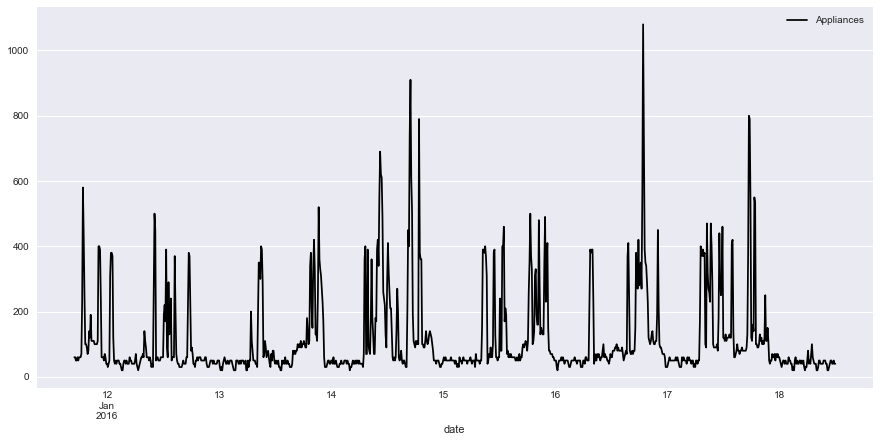

In [9]:
new_df.plot.line(x=new_df.index, y='Appliances', color = 'black', figsize=(15,7))

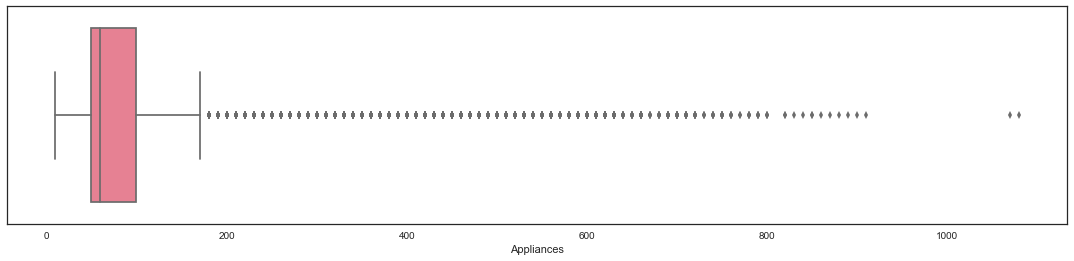

In [10]:
sns.set(style="white", palette="husl")
plt.figure(figsize=(19,4))
b = sns.boxplot(x='Appliances', data=energy)

Text(0,0.5,'Frequency')

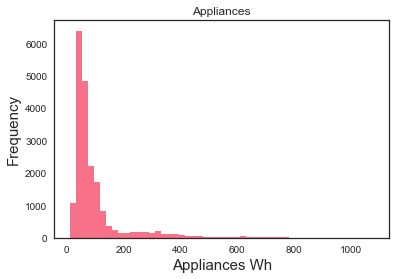

In [11]:
energy.hist(column='Appliances', bins=50, grid=False)
plt.xlabel("Appliances Wh", fontsize=15)
plt.ylabel("Frequency",fontsize=15)

Energy consumption of appliances distribution - over the total period.

In [12]:
key_variables = energy[['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3']]
key_variables.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3
0,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000
1,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000
2,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333
3,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000
4,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000


In [13]:
key_variables.corr()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3
Appliances,1.000000,0.197278,0.055447,0.086031,0.120073,-0.060465,0.085060,0.036292
lights,0.197278,1.000000,-0.023528,0.106968,-0.005622,0.050985,-0.097393,0.131161
T1,0.055447,-0.023528,1.000000,0.164006,0.836834,-0.002509,0.892402,-0.028550
RH_1,0.086031,0.106968,0.164006,1.000000,0.269839,0.797535,0.253230,0.844677
T2,0.120073,-0.005622,0.836834,0.269839,1.000000,-0.165610,0.735245,0.121497
RH_2,-0.060465,0.050985,-0.002509,0.797535,-0.165610,1.000000,0.137319,0.678326
T3,0.085060,-0.097393,0.892402,0.253230,0.735245,0.137319,1.000000,-0.011234
RH_3,0.036292,0.131161,-0.028550,0.844677,0.121497,0.678326,-0.011234,1.000000


In [17]:
#Calculat correlation coefficient
def correlation(x, y, **kwargs):
    
    coef = np.corrcoef(x, y)[0][1]
    # Round the result to 2 decimal places
    label = str(round(coef, 2))
    
    # Add label to plot
    axis = plt.gca()
    axis.annotate(label, xy = (0.2, 0.50), size = 50, xycoords = axis.transAxes)

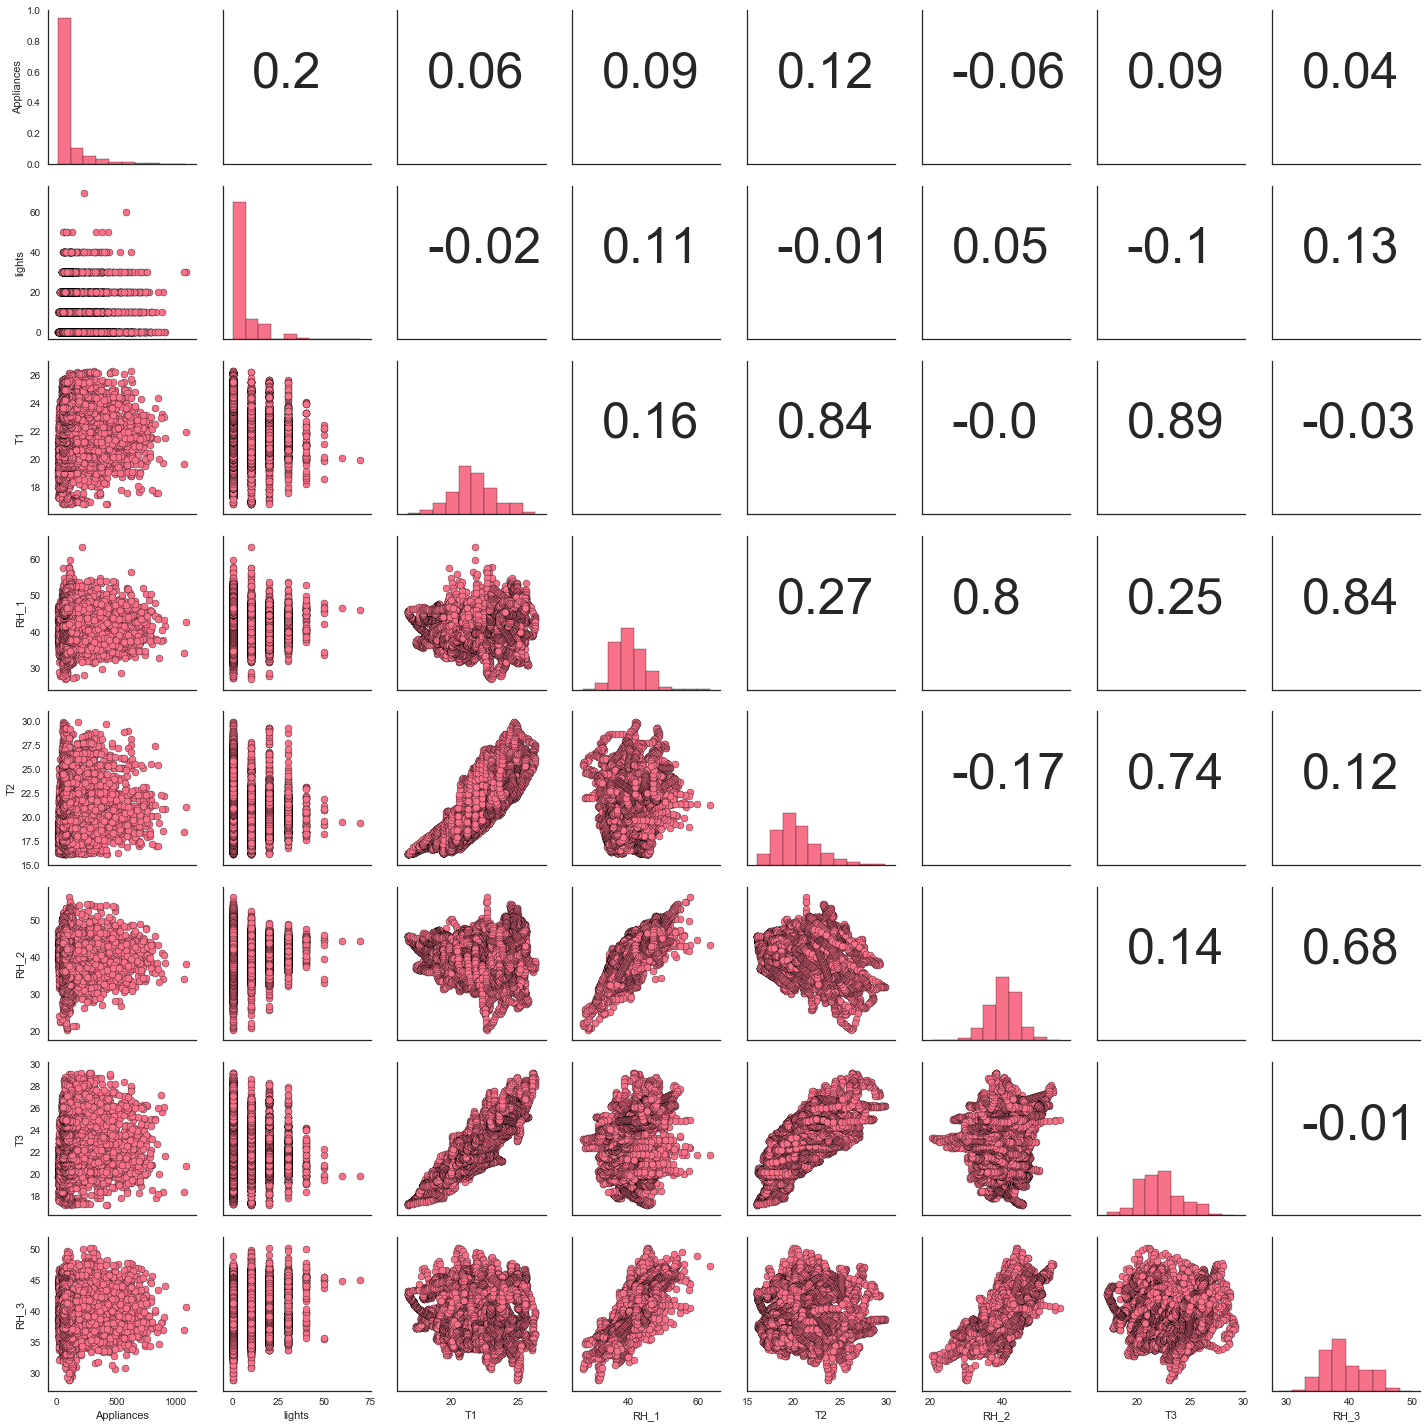

In [18]:
sns.set(style="white", palette="husl")
g = sns.PairGrid(key_variables)
g = g.map_diag(plt.hist, edgecolor = 'k')
g = g.map_lower(plt.scatter,edgecolor = 'k')
g = g.map_upper(correlation)

Pair plot using sns PairGrid to generate similar graph as displayed in Figure 9 of the paper.

Displaying the relationship between the energy consumption variables of appliances with lights, T1, RH1, T2, RH2, T3, RH3. T1 and RH1.

In [21]:
df2 = df['2016-01-12':'2016-01-18']
df2.tail()

,Appliances
date,
2016-01-18 23:10:00,50
2016-01-18 23:20:00,50
2016-01-18 23:30:00,40
2016-01-18 23:40:00,30
2016-01-18 23:50:00,40


In [11]:
df2.dtypes

Appliances    int64
dtype: object

In [12]:
#resample the data by hour 
df2 = df2.resample('H').sum()
df2.head(14)

,Appliances
date,
2016-01-12 00:00:00,850
2016-01-12 01:00:00,1010
2016-01-12 02:00:00,270
2016-01-12 03:00:00,210
2016-01-12 04:00:00,270
2016-01-12 05:00:00,260
2016-01-12 06:00:00,240
2016-01-12 07:00:00,340
2016-01-12 08:00:00,520


In [13]:
df2 = pd.pivot_table(df2, index=df2.index.hour, columns=df2.index.date, values="Appliances")

In [14]:
df2.head()

,2016-01-12,2016-01-13,2016-01-14,2016-01-15,2016-01-16,2016-01-17,2016-01-18
date,,,,,,,
0,850,190,280,320,240,280,270
1,1010,290,220,310,320,310,260
2,270,270,260,280,280,260,260
3,210,190,270,260,250,300,250
4,270,270,210,300,300,310,270


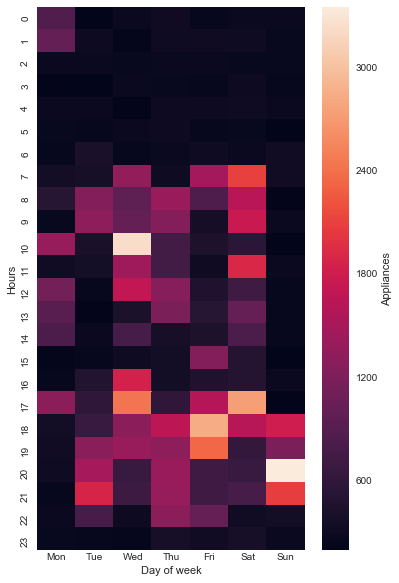

In [20]:
plt.figure(figsize=(6, 10))
sns.heatmap(df2,xticklabels=True, yticklabels=True, cbar_kws={'label': 'Appliances'})
plt.xticks(np.arange(7)+0.5,('Mon','Tue','Wed','Thu','Fri','Sat','Sun'), rotation=0, fontsize="10", va="center")
plt.xlabel('Day of week')
plt.ylabel('Hours')
plt.show()

In [25]:
train.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,NSM,WeekStatus,Day_of_week
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,61200,Weekday,Monday
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,61800,Weekday,Monday
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,62400,Weekday,Monday
3,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,63600,Weekday,Monday
4,2016-01-11 17:50:00,50,40,19.89,46.026667,19.2,44.500000,19.79,44.933333,18.890000,...,734.0,92.0,5.333333,43.833333,4.8,44.919484,44.919484,64200,Weekday,Monday


In [26]:
train.shape

(14803, 32)

In [27]:
test.shape

(4932, 32)

In [24]:
x_train= train.drop(['Appliances'], axis=1)
y_train = train['Appliances']

x_test = test.drop(['Appliances' ], axis=1)
y_test = test['Appliances']

print('X_train shape:',x_train.shape )
print('Y_train shape:',y_train.shape )
print('X_test shape:',x_test.shape )
print('Y_test shape:',y_test.shape )

X_train shape: (14803, 31)
Y_train shape: (14803,)
X_test shape: (4932, 31)
Y_test shape: (4932,)
